In [1]:
import sys

# setting path
sys.path.append('../MassSpecGym')

from smiles_transformer import SmilesTransformer
import utils
from mol_tokenizers import SmilesBPETokenizer
import numpy as np
import matplotlib.pyplot as plt
import pickle

/home/wwelvaer/massSpecGymVenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Refresh modules (usefull for debugging code)
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path
pth = utils.hugging_face_download("MassSpecGym.tsv")
pth = Path(pth)
pth

PosixPath('/home/wwelvaer/.cache/huggingface/hub/datasets--roman-bushuiev--MassSpecGym/snapshots/50bb5d27e4cad0a51a882cefdfb8cc870508de7a/data/MassSpecGym.tsv')

In [4]:
import pandas as pd
data = pd.read_csv(pth, sep="\t")

In [5]:
data.head()

,identifier,mzs,intensities,smiles,inchikey,formula,precursor_formula,parent_mass,precursor_mz,adduct,instrument_type,collision_energy,fold,simulation_challenge
0,MassSpecGymID0000001,"91.0542,125.0233,154.0499,155.0577,185.0961,20...","0.24524524524524524,1.0,0.08008008008008008,0....",CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,30.0,train,True
1,MassSpecGymID0000002,"91.0542,125.0233,155.0577,185.0961,229.0859,24...","0.0990990990990991,0.28128128128128127,0.04004...",CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,20.0,train,True
2,MassSpecGymID0000003,"69.0343,91.0542,125.0233,127.039,153.0699,154....","0.03403403403403404,0.31431431431431434,1.0,0....",CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,40.0,train,True
3,MassSpecGymID0000004,"69.0343,91.0542,110.06,111.0441,112.0393,120.0...","0.17917917917917917,0.47347347347347346,0.0380...",CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,55.0,train,True
4,MassSpecGymID0000005,"91.0542,125.0233,185.0961,229.0859,246.1125,28...","0.07807807807807808,0.1841841841841842,0.03503...",CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,10.0,train,True


25046
MAX: 477
AVG: 7.750499081689691


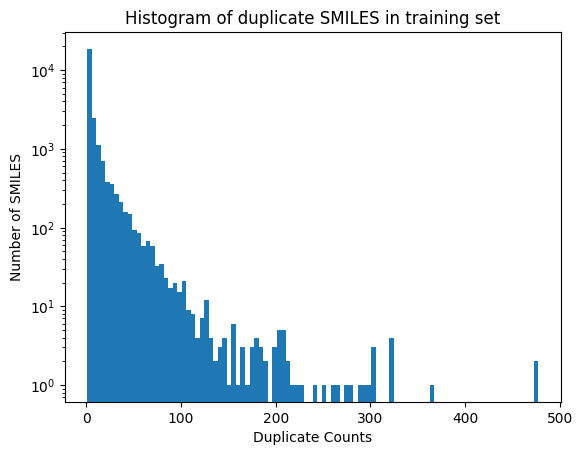

In [6]:
smiles, counts = np.unique(data[data.fold == 'train'].smiles, return_counts=True)
print(len(smiles))
print("MAX:", max(counts))
print("AVG:", sum(counts) / len(counts))

# Plot the histogram
plt.hist(counts, bins=100, log=True)        # adjust 'bins' as needed
plt.xlabel('Duplicate Counts')
plt.ylabel('Number of SMILES')
plt.title('Histogram of duplicate SMILES in training set')
plt.show()

In [18]:
from rdkit import Chem

In [30]:
with open("../MassSpecGym/datasets/unique_train_smiles.pkl", 'rb') as f:
        train_smiles = pickle.load(f)


In [20]:
import pandas as pd
import selfies as sf
import deepsmiles
import rdkit.Chem as Chem

deepSmilesConverter = deepsmiles.Converter(rings=True, branches=True)

def addRepresentations(df):
    
    def getSelfies(smiles):
        return sf.encoder(smiles)

    def getDeepSmiles(smiles):
        return deepSmilesConverter.encode(smiles)

    def getInchI(smiles):
        return Chem.inchi.MolToInchi(Chem.MolFromSmiles(smiles))
    
    # List to collect the new duplicated rows
    selfies = []
    deepsmiles = []
    inchi = []
    
    # Loop over each row in the DataFrame
    for _, row in df.iterrows():
        smiles = row['smiles']
        selfies.append(getSelfies(smiles))
        deepsmiles.append(getDeepSmiles(smiles))
        inchi.append(getInchI(smiles))

    df['selfies'] = selfies
    df['deepsmiles'] = deepsmiles
    df['inchi'] = inchi
    
    return df

In [21]:
addRepresentations(data).head()

,identifier,mzs,intensities,smiles,inchikey,formula,precursor_formula,parent_mass,precursor_mz,adduct,instrument_type,collision_energy,fold,simulation_challenge,selfies,deepsmiles,inchi
0,MassSpecGymID0000001,"91.0542,125.0233,154.0499,155.0577,185.0961,20...","0.24524524524524524,1.0,0.08008008008008008,0....",CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,30.0,train,True,[C][C][=Branch1][C][=O][N][C@@H1][Branch1][#Br...,CC=O)N[C@@H]CC=CC=CC=C6)))))))C=CC=CC=O)O6)))OC,InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...
1,MassSpecGymID0000002,"91.0542,125.0233,155.0577,185.0961,229.0859,24...","0.0990990990990991,0.28128128128128127,0.04004...",CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,20.0,train,True,[C][C][=Branch1][C][=O][N][C@@H1][Branch1][#Br...,CC=O)N[C@@H]CC=CC=CC=C6)))))))C=CC=CC=O)O6)))OC,InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...
2,MassSpecGymID0000003,"69.0343,91.0542,125.0233,127.039,153.0699,154....","0.03403403403403404,0.31431431431431434,1.0,0....",CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,40.0,train,True,[C][C][=Branch1][C][=O][N][C@@H1][Branch1][#Br...,CC=O)N[C@@H]CC=CC=CC=C6)))))))C=CC=CC=O)O6)))OC,InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...
3,MassSpecGymID0000004,"69.0343,91.0542,110.06,111.0441,112.0393,120.0...","0.17917917917917917,0.47347347347347346,0.0380...",CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,55.0,train,True,[C][C][=Branch1][C][=O][N][C@@H1][Branch1][#Br...,CC=O)N[C@@H]CC=CC=CC=C6)))))))C=CC=CC=O)O6)))OC,InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...
4,MassSpecGymID0000005,"91.0542,125.0233,185.0961,229.0859,246.1125,28...","0.07807807807807808,0.1841841841841842,0.03503...",CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,10.0,train,True,[C][C][=Branch1][C][=O][N][C@@H1][Branch1][#Br...,CC=O)N[C@@H]CC=CC=CC=C6)))))))C=CC=CC=O)O6)))OC,InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...


In [27]:
data.to_csv("MassSpecGym_all_representations.tsv", sep="\t")

# SMILES synonyms

In [103]:
import pandas as pd

def augmentDataFrame(df, copy_amount):
    # Example function to randomize the smiles
    def createSynomymSmile(smile):
        return Chem.rdmolfiles.MolToSmiles(Chem.MolFromSmiles(smile), doRandom=True)
    
    # List to collect the new duplicated rows
    new_rows = []
    
    # Loop over each row in the DataFrame
    for _, row in df.iterrows():
        # Check if the row's 'fold' is 'train'
        if row['fold'] == 'train':
            # Duplicate the row 3 times with updated smiles
            for i in range(copy_amount):
                new_row = row.copy()  # Copy the row to avoid modifying the original
                new_row['smiles'] = createSynomymSmile(row['smiles'])
                new_row['identifier'] = row['identifier'] + f"_{i}"
                new_rows.append(new_row)
    
    # Convert the new rows list to a DataFrame
    df_duplicates = pd.DataFrame(new_rows)
    
    # Append the new duplicated rows to the original DataFrame
    df_final = pd.concat([df, df_duplicates], ignore_index=True)
    
    return df_final


In [115]:
augmented_data = augmentDataFrame(data, 2)

In [116]:
len(augmented_data[augmented_data.fold == "train"]) / len(data[data.fold == "train"])

3.0

In [117]:
augmented_data[augmented_data.identifier.str.contains("MassSpecGymID0000001")]

,identifier,mzs,intensities,smiles,inchikey,formula,precursor_formula,parent_mass,precursor_mz,adduct,instrument_type,collision_energy,fold,simulation_challenge
0,MassSpecGymID0000001,"91.0542,125.0233,154.0499,155.0577,185.0961,20...","0.24524524524524524,1.0,0.08008008008008008,0....",CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,30.0,train,True
231104,MassSpecGymID0000001_0,"91.0542,125.0233,154.0499,155.0577,185.0961,20...","0.24524524524524524,1.0,0.08008008008008008,0....",c1cc(ccc1)C[C@H](NC(C)=O)c1oc(cc(OC)c1)=O,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,30.0,train,True
231105,MassSpecGymID0000001_1,"91.0542,125.0233,154.0499,155.0577,185.0961,20...","0.24524524524524524,1.0,0.08008008008008008,0....",c1ccccc1C[C@@H](c1oc(cc(c1)OC)=O)NC(=O)C,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,30.0,train,True


In [118]:
augmented_data.to_csv("MassSpecGym_augmented_2.tsv", sep="\t")

# Spectra MZ shifting

In [6]:
import pandas as pd
import random

def augmentSpectraMZshift(df, copy_amount=1, mz_shift_p=0.2, max_mz_shift=50):
    # Example function to randomize the smiles
    def shiftMZ_spectra(mzs):
        shift = random.random() * max_mz_shift
        return ",".join([f"{float(mz) + shift:.4f}" for mz in mzs.split(",")])
        
    # List to collect the new duplicated rows
    new_rows = []
    
    # Loop over each row in the DataFrame
    for _, row in df.iterrows():
        # Check if the row's 'fold' is 'train'
        if row['fold'] == 'train':
            if random.random() <= mz_shift_p:
                # Duplicate the row 3 times with updated smiles
                for i in range(copy_amount):
                    new_row = row.copy()  # Copy the row to avoid modifying the original
                    new_row['mzs'] = shiftMZ_spectra(row['mzs'])
                    new_row['identifier'] = row['identifier'] + f"_{i}"
                    new_rows.append(new_row)
    
    # Convert the new rows list to a DataFrame
    df_duplicates = pd.DataFrame(new_rows)
    
    # Append the new duplicated rows to the original DataFrame
    df_final = pd.concat([df, df_duplicates], ignore_index=True)
    
    return df_final

In [12]:
augmented_spectra = augmentSpectraMZshift(data,mz_shift_p=1)

In [13]:
len(augmented_spectra[augmented_spectra.fold == "train"])/len(data[data.fold == "train"])

2.0

In [14]:
augmented_spectra[augmented_spectra.identifier.str.contains("MassSpecGymID0000001")]

,identifier,mzs,intensities,smiles,inchikey,formula,precursor_formula,parent_mass,precursor_mz,adduct,instrument_type,collision_energy,fold,simulation_challenge
0,MassSpecGymID0000001,"91.0542,125.0233,154.0499,155.0577,185.0961,20...","0.24524524524524524,1.0,0.08008008008008008,0....",CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,30.0,train,True
231104,MassSpecGymID0000001_0,"121.4780,155.4471,184.4737,185.4815,215.5199,2...","0.24524524524524524,1.0,0.08008008008008008,0....",CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,30.0,train,True


In [15]:
augmented_spectra.to_csv("MassSpecGym_mz_shift_augmented_1.tsv", sep="\t")